<a href="https://colab.research.google.com/github/fatjan/final-project-DPS1-B/blob/v_putri/Garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload() #this will prompt you to update the json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

# Visit www.kaggle.com ⇨ login ⇨ My Account ⇨ Create New API Token
# kaggle.json will be downloaded
# upload kaggle.json file here

Saving kaggle.json to kaggle.json
kaggle.json


In [0]:
!mkdir gc-dataset #make a folder for our downloaded dataset

In [3]:
!kaggle datasets download -d andreasantoro/split-garbage-dataset -p /content/gc-dataset

 89% 73.0M/81.7M [00:04<00:00, 16.2MB/s]
100% 81.7M/81.7M [00:04<00:00, 20.8MB/s]


In [4]:
cd gc-dataset/

/content/gc-dataset


In [0]:
!unzip -qq split-garbage-dataset.zip

In [6]:
import numpy as np
import random
import os
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
dataset_dir = os.path.join('/content', 'gc-dataset')
train_dir = os.path.join(dataset_dir, 'train')
valid_dir = os.path.join(dataset_dir, 'valid')
test_dir = os.path.join(dataset_dir, 'test')

cardboard_train_dir = os.path.join(train_dir, 'cardboard')
glass_train_dir = os.path.join(train_dir, 'glass')
metal_train_dir = os.path.join(train_dir, 'metal')
paper_train_dir = os.path.join(train_dir, 'paper')
plastic_train_dir = os.path.join(train_dir, 'plastic')
trash_train_dir = os.path.join(train_dir, 'trash')

cardboard_valid_dir = os.path.join(valid_dir, 'cardboard')
glass_valid_dir = os.path.join(valid_dir, 'glass')
metal_valid_dir = os.path.join(valid_dir, 'metal')
paper_valid_dir = os.path.join(valid_dir, 'paper')
plastic_valid_dir = os.path.join(valid_dir, 'plastic')
trash_valid_dir = os.path.join(valid_dir, 'trash')

cardboard_test_dir = os.path.join(test_dir, 'cardboard')
glass_test_dir = os.path.join(test_dir, 'glass')
metal_test_dir = os.path.join(test_dir, 'metal')
paper_test_dir = os.path.join(test_dir, 'paper')
plastic_test_dir = os.path.join(test_dir, 'plastic')
trash_test_dir = os.path.join(test_dir, 'trash')

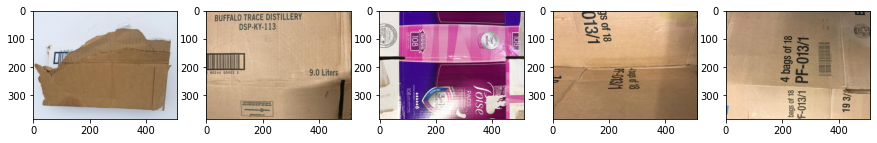

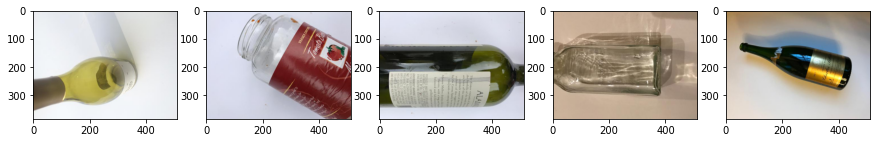

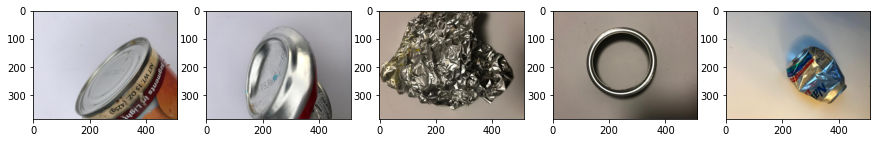

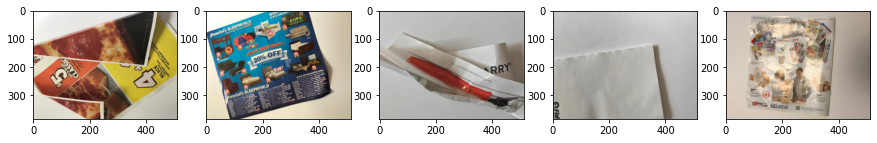

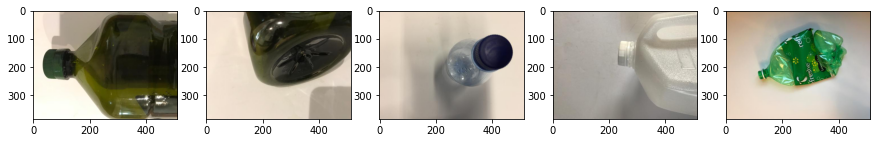

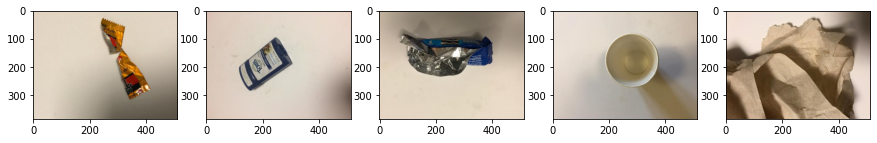

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

numb_of_pic = 5
rand_int = []
for i in range(numb_of_pic):
  rand_int.append(random.randint(0, len(os.listdir(trash_train_dir))))

cardboard_listdir = [os.listdir(cardboard_train_dir)[i] for i in rand_int]
glass_listdir = [os.listdir(glass_train_dir)[i] for i in rand_int]
metal_listdir = [os.listdir(metal_train_dir)[i] for i in rand_int]
paper_listdir = [os.listdir(paper_train_dir)[i] for i in rand_int]
plastic_listdir = [os.listdir(plastic_train_dir)[i] for i in rand_int]
trash_listdir = [os.listdir(trash_train_dir)[i] for i in rand_int]

cardboard_listdir = [os.path.join(cardboard_train_dir, fname) for fname in cardboard_listdir]
glass_listdir = [os.path.join(glass_train_dir, fname) for fname in glass_listdir]
metal_listdir = [os.path.join(metal_train_dir, fname) for fname in metal_listdir]
paper_listdir = [os.path.join(paper_train_dir, fname) for fname in paper_listdir]
plastic_listdir = [os.path.join(plastic_train_dir, fname) for fname in plastic_listdir]
trash_listdir = [os.path.join(trash_train_dir, fname) for fname in trash_listdir]

plt.figure(figsize=(15, 10))
for i, image in enumerate(cardboard_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(cardboard_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(glass_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(glass_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(metal_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(metal_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(paper_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(paper_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(plastic_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(plastic_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(trash_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(trash_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

# Building Model

In [9]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = valid_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=30
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=30
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=75, steps_per_epoch=15, validation_data = validation_generator, verbose = 1, validation_steps=5)
model.save("rps.h5")

Found 1768 images belonging to 6 classes.
Found 328 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_______________________________________

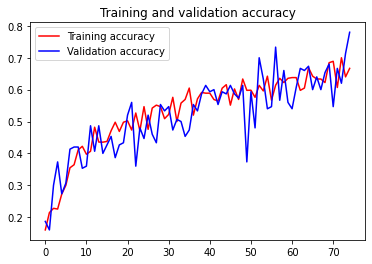

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()